<div style="text-align: center;">
    <h1>PROJET : Eco-Optimisation d'une chaine d'acheminement de marchandises</h1>
</div>

<h2>Algorithmique et optimisation combinatoire</h2>

---

<h2>Équipe</h2>

---

- **Aversenq Romuald**
- **Fransolet Justin**
- **Ngadjou Lesline**


---

<h2>Rappel du contexte</h2>

---

À la suite d'un appel d'offre lancé par l’ADEME *(Agence de l’Environnement et de la Maîtrise de l’Énergie)*, nous avons pour objectif de participer au développement de méthodes de transport plus économes et plus écologiques. Notre équipe se focalisera ainsi sur l'optimisation des tournées de livraison, part importante des émissions polluantes de la ville.

Globalement, le problème consiste à calculer un itinéraire optimal reliant plusieurs villes tout en prenant en compte différents éléments comme la durée de trajet, le type de marchandise, etc. La solution recherchée doit s’appuyer sur des techniques de Recherche Opérationnelle et proposer un algorithme capable de gérer des instances de grande taille *(jusqu'à plusieurs milliers de villes)*. Le projet inclut également la possibilité d’ajouter des contraintes supplémentaires pour rendre une solution des plus optimales ; comme des fenêtres de temps, la gestion de plusieurs camions ou des variations de trafic.

---

<h2>Cahier des charges</h2>

---

- k camions disponibles simultanément pour effectuer les livraisons. Le calcul de la tournée devra inclure l’affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimiser non plus le temps total, mais la date de retour du dernier camion à la base.
    - Capacité des camions *(volume)* et encombrement des objets
    - Certains objets ne peuvent être livrés que par certains camions.

- La solution proposée devra gérer des instances de grande taille *(jusqu'à plusieurs milliers de villes).*

- Les marchandises ne pourront pas être transportées par n’importe quel camion. Les objets seront de différents types, et chaque camion ne pourra transporter que certains types d’objets.

---

<h2>Planification</h2>

---

Tout d'abord, l'organisation du Github est une étape essentielle dans la bonne réalisation du projet. Ainsi nous prendrons soin d'organiser les branches en fonction des fonctionalités à implementer.

Ensuite, nous utiliserons deux outils pour gérer les tâches entre nous, un diagramme de Gantt et un tableau de répartition qui nous vient de la méthodologie SCRUM. Ces deux vues nous permettent d'avoir des perspectives differentes sur les tâches à faire, Gantt nous permet de visualiser le projet dans le temps en globalité, tandis que la tableau de répartition permet plus localement de repartir les tâches sur des périodes courtes.

Tout est disponible ici sur notre projet partagé : https://docs.google.com/spreadsheets/d/1Dhj9WE8up2-2Jom8v5TNlueWG929-saf-i7Rz2a4psE/edit?usp=sharing

---

<h2>Faisabilité</h2>

---

Nous souhaitons tout d'abord démontrer que le problème du voyageur de commerce est de classe NP-Complet, en effet le TSP est le problème qui se rapproche le plus de notre situation. Le Problème du Voyageur de Commerce *(ou TSP, pour Traveling Salesman Problem)* est un problème célèbre en théorie des graphes et en optimisation combinatoire.

Pour rappel, l'objectif est de trouver le plus court chemin qui permet à un vendeur de visiter chaque ville exactement une fois et de revenir à son point de départ. Le TSP se rapporte à un problème de classe NP-Complet, ce qui signifie qu'il est à la fois difficile à résoudre (pas de solution efficace connue pour tous les cas), mais facile à vérifier (on peut vérifier en temps polynomial si une solution donnée est correcte).

**Prouvons d'abord que le TSP appartient à la classe NP :**

Un problème est dans la classe NP si, une fois qu'on nous donne une solution potentielle, on peut vérifier en temps polynomial si c'est une solution valide.

Nous avons :
- Liste de villes
- Distances entre chaque paire de villes
- Une solution proposée (un cycle passant par toutes les villes)

Or, pour vérifier si la solution est correcte, il suffit de :
- Vérifier que le cycle passe par chaque ville exactement une fois (c'est faisable en parcourant la liste des villes et en comptant les occurrences, ce qui prend un temps linéaire).
- Calculer la longueur totale du circuit en additionnant les distances entre les villes successives (cela peut être fait en temps polynomial).
- Comparer cette longueur totale à un seuil donné (le coût maximal autorisé).

Ces étapes peuvent être effectuées en temps polynomial par rapport au nombre de villes, ce qui signifie que le problème est vérifiable rapidement. Ainsi, le TSP appartient à NP.


**Démontrons l'appartenance à la classe NP-Complet :**

Pour rappel, un problème est NP-Complet :
- Si il appartient à NP
- Tout problème NP peut se réduire en temps polynomial à ce problème.

Cela signifie que si l'on trouve une solution efficace pour le TSP, on pourrait l'utiliser pour résoudre n'importe quel autre problème NP en temps polynomial.

Pour prouver que le TSP est NP-Complet, il faut montrer qu'un autre problème NP-Complet bien connu puisse se réduire au TSP. La réduction consiste à transformer une instance de ce problème en une instance du TSP de manière à ce que les solutions se correspondent.
Un des problèmes NP-Complet les plus utilisés pour faire cette démonstration est le Problème du Circuit Hamiltonien (HCP, pour Hamiltonian Cycle Problem). Le HCP consiste à déterminer s'il existe un cycle hamiltonien (un cycle qui visite chaque sommet exactement une fois) dans un graphe donné.

Or mis le fait, qu'intuitivement, les deux problèmes sont proches, nous souhaitons faire une démonstration rigoureuse. Réduisons alors le HCP vers TSP.

Soit un graphe $ G = (V, E) $ avec un ensemble de sommets $ V $ et d’arêtes $ E $. On cherche à savoir s'il existe un cycle hamiltonien dans ce graphe.

Construisons une instance du TSP où :

- $ v \in V $ devient une ville dans l'instance du TSP.
- Si deux sommets $ v_i $ et $ v_j $ sont connectés par une arête dans $ G $, la distance entre les villes correspondantes $ v_i $ et $ v_j $ est de $ 1 $.
- Si les sommets ne sont pas connectés, la distance est fixée à une grande valeur $ M $ (une valeur suffisamment grande pour que ce chemin ne soit jamais choisi dans une solution optimale).

On définit donc la matrice des distances $ D $ telle que :

$
D(v_i, v_j) =
\begin{cases}
1 & \text{si } (v_i, v_j) \in E, \\
M & \text{sinon.}
\end{cases}
$


Ensuite, il s'agit de determiner un cycle de longueur $ |V| $ avec un coût total de $ |V| $ dans le TSP.

Si un tel cycle existe, cela équivaut à trouver un cycle hamiltonien dans le graphe original $ G $. En effet, le cycle passe exactement par chaque sommet une seule fois, et comme la distance entre les sommets connectés est 1, le coût total sera de $ |V| $.

Ainsi, si un cycle hamiltonien existe dans $ G $, il correspondra exactement à une solution du TSP avec un coût total de $ |V| $. Sinon, toute solution au TSP aurait un coût supérieur à $ |V| $, car elle utiliserait des distances de $ M $, qui sont très grandes.

Puisque le problème du Circuit Hamiltonien est NP-Complet et que nous avons montré qu'il peut être transformé en une instance du TSP en temps polynomial, cela signifie que \textbf{le TSP est au moins aussi difficile que le HCP} et donc que TSP appartient à la classe des problèmes NP-Complets.



<h2>Modélisation</h2>

---

<div style="text-align: center;">
<h3>Algorithme de génération pseudo aléatoire d'instance de problème</h3>
<img src="images/lava_lamps.jpg" alt="Lava Lamps" width="400px" height="300px" style="border: 2px solid white; border-radius: 20px;">
</div>

---

Cet algorithme n'est pas régi par les règles de modélisation de recherche opérationnelle, car il ne représente pas de solution à une problématique de programmation linéaire. La modélisation suivra alors des règles classiques de modélisation d'algorithme.
De plus, il n'est pas compris dans le contexte du projet, son développement servira principalement pour la démonstration.


<h4>Objectif</h4>

L'algorithme doit retourner différents couples (matrice, liste_colis) avec les matrices d'adjacence qui correspondent aux plans de villes et les objets colis (type, dimensions, destination valide) qui vont avec. Enfin, les données doivent être enregistrées dans des fichiers distincts.

<h4>Données d'entrée</h4>

- Nombre de villes
- Nombre de routes
- Nombre de camions
- Ville de départ

<h4>Données de sortie</h4>

- Plan de la ville traduit en matrice d'adjacence
- Liste des colis (type, dimensions, emplacement...)
- Liste des camions (type, capacité...)

<h4>Contraintes</h4>

- Matrices valides (graphe connexe, graphe pondéré, nombre de nœuds supérieur à 3)
- Poids des arrêts est choisi aléatoirement entre 1 minute et 3 heures (180 minutes) dans 70% des cas et entre 3 heures et 6 heures (360 minutes) dans 30% des cas.
- Point de départ et emplacements des colis valides
- Caractéristiques colis conformes

<h4>Pseudo code</h4>

1. Choix du nombre d'instances de problème à générer

2. Générer matrices d'adjacences aléatoires de graphes connexes quelconques

3. Pour chaque matrice, créer une quantité aléatoire de colis avec un type aléatoire et un emplacement aléatoire compris dans la matrice.

4. Enregistrer les données dans un fichier CSV sous la forme suivante : 

   4.1. Matrice d'adjacence 
    
   4.2. Liste d'objets Colis
   
   4.3. Point du départ

---

<div style="text-align: center;">
<h3>Algorithme de répartition des marchandises dans les camions</h3>
<img src="images/load_truck.jpg" alt="Load Truck" width="400px" height="300px" style="border: 2px solid white; border-radius: 20px;">
</div>

---

Algorithme MCCVRPTWCC (Multi-Commodity Capacitated Vehicle Routing Problem with Time Windows and Compatibility Constraints)

<h4>Variables de décision</h4>

$ P_{C_tK_t} \in [0,1] \rightarrow $ variable binaire qui vaut 1 si le véhicule $K_t$ peut transporter le type de marchandise $C_t$, et 0 sinon.

$ W_{ab} \in [0,1] \rightarrow $ variable binaire qui vaut 1 si le type de marchandise `a` peut être transporté avec le type de marchandises `b`, et 0 sinon.

<h4>Variables Intermédiaire</h4>

$ q_i^c \rightarrow $ quantité de marchandise `c` à livrer au client `i`.

$ T^{Start}_i \rightarrow $ Date de début de la fenêtre.

$ T^{End}_i \rightarrow $ Date de fin de la fenêtre.

$C^{destination, volume, type}_c \rightarrow $ Représentation d'un colis.

$K^{volume, type, fret, nombre\,de\,destination}_k \rightarrow $ Représentation d'un camion.

`i` : Destination (sommet du graphe)

`a`, `b` $ \in \{Pas\, spécifié, Alimentaire, Inflammable, Explosif, Toxic, Radioactif, Corrosif, Oxidant, Pressurisé, Fragile \}$

$C_k$ = $\{i \in C | y_{ik} = 1\}$ : Ensembles des destinations

${charge} = {nombre\,de\,colis}\div{nombre\,de\,camions}$

<h4>Contraintes</h4>

**Minimisation des destinations**

$\sum_c C^{destination}_c \geq \frac{charge}{K^{nb\,destination}_k}\; \forall k$

**Respect des fenêtres de temps**

$ T^{End}_{c-1} \leq T^{End}_{c} \leq T^{End}_{c+1}\;\forall i \in C_k$

**Un camion ne peut transporter que type de marchandise compatible**

| Type         | Pas spécifié | Alimentaire | Inflammable | Explosif | Toxic | Radioactif | Corrosif | Oxidant | Pressurisé | Fragile |
|--------------|--------------|-------------|-------------|----------|-------|------------|----------|---------|------------|---------|
| Pas spécifié | 1            | 1           | 1           | 1        | 1     | 1          | 1        | 1       | 1          | 1       |
| Alimentaire  | 1            | 1           | 0           | 0        | 0     | 0          | 0        | 0       | 0          | 1       |
| Inflammable  | 1            | 0           | 1           | 0        | 0     | 0          | 0        | 0       | 0          | 0       |
| Explosif     | 1            | 0           | 0           | 1        | 0     | 0          | 0        | 0       | 0          | 0       |
| Toxic        | 1            | 0           | 0           | 0        | 1     | 1          | 1        | 1       | 1          | 0       |
| Radioactif   | 1            | 0           | 0           | 0        | 1     | 1          | 0        | 0       | 0          | 0       |
| Corrosif     | 1            | 0           | 0           | 0        | 1     | 0          | 1        | 1       | 0          | 0       |
| Oxidant      | 1            | 0           | 0           | 0        | 1     | 0          | 1        | 1       | 0          | 0       |
| Pressurisé   | 1            | 0           | 0           | 0        | 1     | 0          | 0        | 0       | 1          | 0       |
| Fragile      | 1            | 1           | 0           | 0        | 0     | 0          | 0        | 0       | 0          | 1       |

$\prod_a \prod_b W_{ab} = 1\;\forall a,b \in K_m$

**Réglementation des transports pour les différents types de marchandises (Type de camions)**

| Type       | Pas spécifié | Alimentaire | Inflammable | Explosif | Toxic | Radioactif | Corrosif | Oxidant | Pressurisé | Fragile |
|------------|--------------|-------------|-------------|----------|-------|------------|----------|---------|------------|---------|
| Ouvert     | 1            | 0           | 1           | 1        | 0     | 0          | 0        | 0       | 1          | 1       |
| Réfrigérer | 1            | 1           | 0           | 0        | 0     | 0          | 0        | 0       | 0          | 1       |
| Étanche    | 1            | 0           | 1           | 1        | 1     | 0          | 1        | 1       | 0          | 1       |
| Blindé     | 1            | 1           | 1           | 1        | 1     | 1          | 1        | 1       | 1          | 1       |

$\prod_c P_{C_tK_t} = 1\;\forall c \in K_m$

<h4>Fonction objectif</h4>

**Maximisation du taux de remplissage des camions**

$F = \sum_i q_i^c\:\times y_{ik}\;\forall k, i \in C_k$

<h4>Pseudo code</h4>

1. **Initialisation :**

   1.1. Instancier les listes des objects

2. **Vérifier la faisabilité des contraintes**

3. **Trier les objets :**

   3.1. Trier les marchandises par ordre décroissant par rapport à leur couplage
   
   3.2. Trier les camions en fonction de leur taille et de leur couplage dans l'ordre croissant.

4. **Attribuer un camion à chaque cargaison :**

   4.1. Pour chaque marchandise `m` dans `M` :
   
        4.1.1. Trouver un camion disponible `c` avec assez de capacité et compatible avec le type de marchandise.

        4.1.2. Assigner la marchandise `m` au camion `c`.

5. **Retourner la liste des camions avec leurs cargaisons et tournées.**


---

<div style="text-align: center;">
<h3>Algorithme de génération de l'itinéraire optimal</h3>
<img src="images/map.jpg" alt="itinéraire optimal" width="400px" height="300px" style="border: 2px solid white; border-radius: 20px;">
</div>

---
<h4>Variable de décision</h4>

Les variables de decision décrivent les choix que l’algorithme peut effectuer. Dans ce cas, il s’agit de variables représentant les trajets, les camions et les objets (box).

- $X^k_{ij}$ : variable binaire qui prend la valeur 1 si le camion `k` emprunte l’arête (route) entre le point (`i`) et le point (`j`) et 0 sinon. Elle permet de modéliser les trajets possibles entre les différents points ; Grace a elle on peut savoir quelles routes sont empruntés par chacun des camions.
Exemple : $ x^1_{23}$ =1, ie le camion 1 prend la route entre le point 2 et le point 3.

- $y^i_k$ : Variable binaire qui prend la valeur 1 si le camion `k` livre un objet au point `i` et 0 sinon. Celle-ci indique ou les camions peuvent effectuer les livraisons ou les collectes. De même, elle permet de s’assurer que chaque point de livraison est visité au moins une fois par un camion.
Exemple : $y^2_5$ =1, ie le camion 2 effectue une livraison au point 5.

<h4>Contraintes</h4>
	
Une contrainte est une limitation, une restriction qui impose certaine condition sur les données ou des processus dans le cadre du développement d’un système.

1. **Contrainte sur le parcours**

$ \sum_jX^k_{ij} = y^k_j \; \forall _{i,k}$

Interprétation : cette contrainte assure que si un camion `k` visite un point `i` (donc $y^k_j$ =1), alors il doit entrer dans ce point en venant d’un autre point `j` (ce qui correspond à $x^k_{ij} = 1$). Elle garantit que si un point de livraison est visité, cela doit se traduire par un mouvement de camion. Cela empêche que les solutions ou le camion livrerait un point sans y être passé par une route.


2. **Contrainte sur le retour à la base**

$X^k_{0j}=X^k_{j0}= 1 \forall_i$

Interprétation : chaque camion `k` doit partir de la base (notée 0) et y revenir à la fin de sa tournée. En d’autres termes, il y a toujours un trajet entre la base et le premier point de livraison, et le trajet de retour après la dernière livraison. Cette contrainte garantit que les camions commencent et finissent leurs parcours à un point central (dépôt ou base).

<h4>Fonction objectif</h4>

L’objectif principal est de minimiser le temps total de livraison, ce qui inclut les trajets des camions et le retour du dernier camion à la base. La fonction à minimiser est formulé comme suit :

$ min\sum_k\sum_i\sum_j X^k_{ij}t_{ij}+ \sum_k max_i t^k_i $



<h4>Pseudo code</h4>

1. Initialisation :
	
	1.1. Récupérer le graphe
	
    1.1. Récupérer les boîtes

    1.1. Récupérer les camions
 
2. Appliquer une approche par métaheuristique:
	
	2.1. Initialisation d’une population d’itinéraires valides
	
	3.2. Pour chaque génération :

		3.2.1. Sélection des meilleurs itinéraires selon la fonction objectif
		
		3.2.2. Appliquer des mutations (changer l’ordre des points de livraison)
		
		3.2.3. Réparer les solutions invalides ( contrainte de capacité, fenêtre de temps)
		
		3.2.4. Calcul de la nouvelle valeur de la fonction objectif
		
		3.2.5. Converge vers la solution optimale

4. Retourner la meilleure solution (ensemble des itinéraires pour chaque camion).


---

<div style="text-align: center;">
<h3>Implémentation de plusieurs exemples</h3>
<img src="images/work.jpg" alt="Work" width="400px" height="300px" style="border: 2px solid white; border-radius: 20px;">
</div>

---

<h4>Objets utilisés :</h4>

In [6]:
from random import randint
import numpy as np
from src.infrastructure import InstanceLoader as InstLoader
from src.domains import SortationAlgorithm as sortAlg
from src.domains import AlgorithmV3 as algV3

In [10]:
from src.domains import InstanceGenerator

InstanceGenerator.generate_instance("src", 1000, 3000, True, 12)

<h4>Exemple sur une instance de petite taille :</h4>

In [13]:
small_instance = InstLoader("src\\infrastructure\\instances","small")
graph = small_instance.get_graph()

sortation = sortAlg(small_instance.get_boxes(), small_instance.get_trucks(), graph)

#Variables
loaded_trucks = sortation.getTruckLoaded()
starting_point = randint(0, len(graph)-1)

depots = []
for truck in loaded_trucks:
    l = []
    for package in truck.get_fret():
        l.append(package.get_destination().get_location())
    depots.append(l)

for dest in depots:
    print(dest)
    # Calculer l'itinéraire
    chemin, distance_totale = algV3.itineraire(graph, starting_point, dest)
    print("Chemin trouvé : ", chemin)
    print("Distance totale : ", distance_totale)

[190, 193, 124]
Chemin trouvé :  [416, 190, 416, 124, 193, 416]
Distance totale :  43.0
[218, 168, 109]


KeyboardInterrupt: 

<h4>Exemple sur une instance de grande taille :</h4>

In [12]:
large_instance = InstLoader("src\\infrastructure\\instances", "large")
graph = large_instance.get_graph()

sortation = sortAlg(large_instance.get_boxes(), large_instance.get_trucks(), graph)

#Variables
loaded_trucks = sortation.getTruckLoaded()
starting_point = randint(0, len(graph)-1)

depots = []
for truck in loaded_trucks:
    l = []
    for package in truck.get_fret():
        l.append(package.get_destination().get_location())
    depots.append(l)

for dest in depots:
    print(dest)
    # Calculer l'itinéraire
    chemin, distance_totale = algV3.itineraire(graph, starting_point, dest)
    print("Chemin trouvé : ", chemin)
    print("Distance totale : ", distance_totale)

[536, 433, 22, 853, 117, 557, 776, 807, 577, 394, 117, 661, 37, 506, 909, 603, 59, 546, 649, 459, 963, 704, 660, 237, 215, 602, 924, 29, 47, 104, 426, 67, 623, 8, 597, 99, 898, 289, 258]


KeyboardInterrupt: 

<h4>Exemple sur une instance avec un graphe orienté et asymmetric :</h4>

In [4]:
asym_instance = InstLoader("src\\infrastructure\\instances", "asym")
graph = asym_instance.get_graph()

sortation = sortAlg(asym_instance.get_boxes(), asym_instance.get_trucks(), graph)

#Variables
loaded_trucks = sortation.getTruckLoaded()
starting_point = randint(0, len(graph)-1)

depots = []
for truck in loaded_trucks:
    l = []
    for package in truck.get_fret():
        l.append(package.get_destination().get_location())
    depots.append(l)

for dest in depots:
    print(dest)
    # Calculer l'itinéraire
    chemin, distance_totale = algV3.itineraire(graph, starting_point, dest)
    print("Chemin trouvé : ", chemin)
    print("Distance totale : ", distance_totale)

[96, 226, 266, 82, 105, 172, 309, 197, 49, 175, 189, 75, 111, 313, 385, 291, 140, 253, 433]


KeyboardInterrupt: 

<h4>Exemple sur une instance avec un graphe non-orienté donc symmetric :</h4>

In [5]:
sym_instance = InstLoader("src\\infrastructure\\instances", "sym")
graph = sym_instance.get_graph()

sortation = sortAlg(sym_instance.get_boxes(), sym_instance.get_trucks(), graph)

#Variables
loaded_trucks = sortation.getTruckLoaded()
starting_point = randint(0, len(graph)-1)

depots = []
for truck in loaded_trucks:
    l = []
    for package in truck.get_fret():
        l.append(package.get_destination().get_location())
    depots.append(l)

for dest in depots:
    print(dest)
    # Calculer l'itinéraire
    chemin, distance_totale = algV3.itineraire(graph, starting_point, dest)
    print("Chemin trouvé : ", chemin)
    print("Distance totale : ", distance_totale)

[431, 16, 193, 186, 351, 84, 188, 206, 448, 175, 296, 346, 348, 204, 104, 343, 149, 202, 367, 20, 152]


KeyboardInterrupt: 

---

<div style="text-align: center;">
<h3>Étude de la compléxité temporelle théorique et de la compléxité spaciale théorique</h3>
<img src="images/complexe.jpg" alt="Compléxité" width="400px" height="300px" style="border: 2px solid white; border-radius: 20px;">
</div>

---

<h4>Algorithme de génération d'instance</h4>

- Génération du graphe pseudo-aléatoire $\rightarrow \mathcal{O}(v^2+e)$
    - `v` = le nombre de sommets du graphe
    - `e` = le nombre d'arêtes avec un poids différent de l'infini
- Génération de camion et de fret $\rightarrow \mathcal{O}(t)$
    - `t` = le nombre de camions à générer

CTT = $\mathcal{O}(V^2+E+T)$

<h4>Algorithme de répartition des marchandises dans les camions</h4>

- Fichier SolutionChecker $\rightarrow \mathcal{O}(b+t)$
    - `t` = nombre de camions
    - `b` = nombre de boites
- Méthode __sortByType $\rightarrow \mathcal{O}(b)$
- Méthode __checkContainability $\rightarrow \mathcal{O}(b + t * k)$
    - `k` = nombre de distincts types de boites
- Méthode __remove_incompatible_boxes $\rightarrow \mathcal{O}(p + p\log{p})$
    - `p` = nombre de boites dans le fret du camion

CTT = $\mathcal{O}(t\log{t} + b\log{b} + t*b*k)$

<h4>Algorithme de génération d'itinéraire optimal</h4>

---

<div style="text-align: center;">
<h3>Étude statistique</h3>
<img src="images/statistics.jpg" alt="statistique" width="400px" height="300px" style="border: 2px solid white; border-radius: 20px;">
</div>

---
blabla

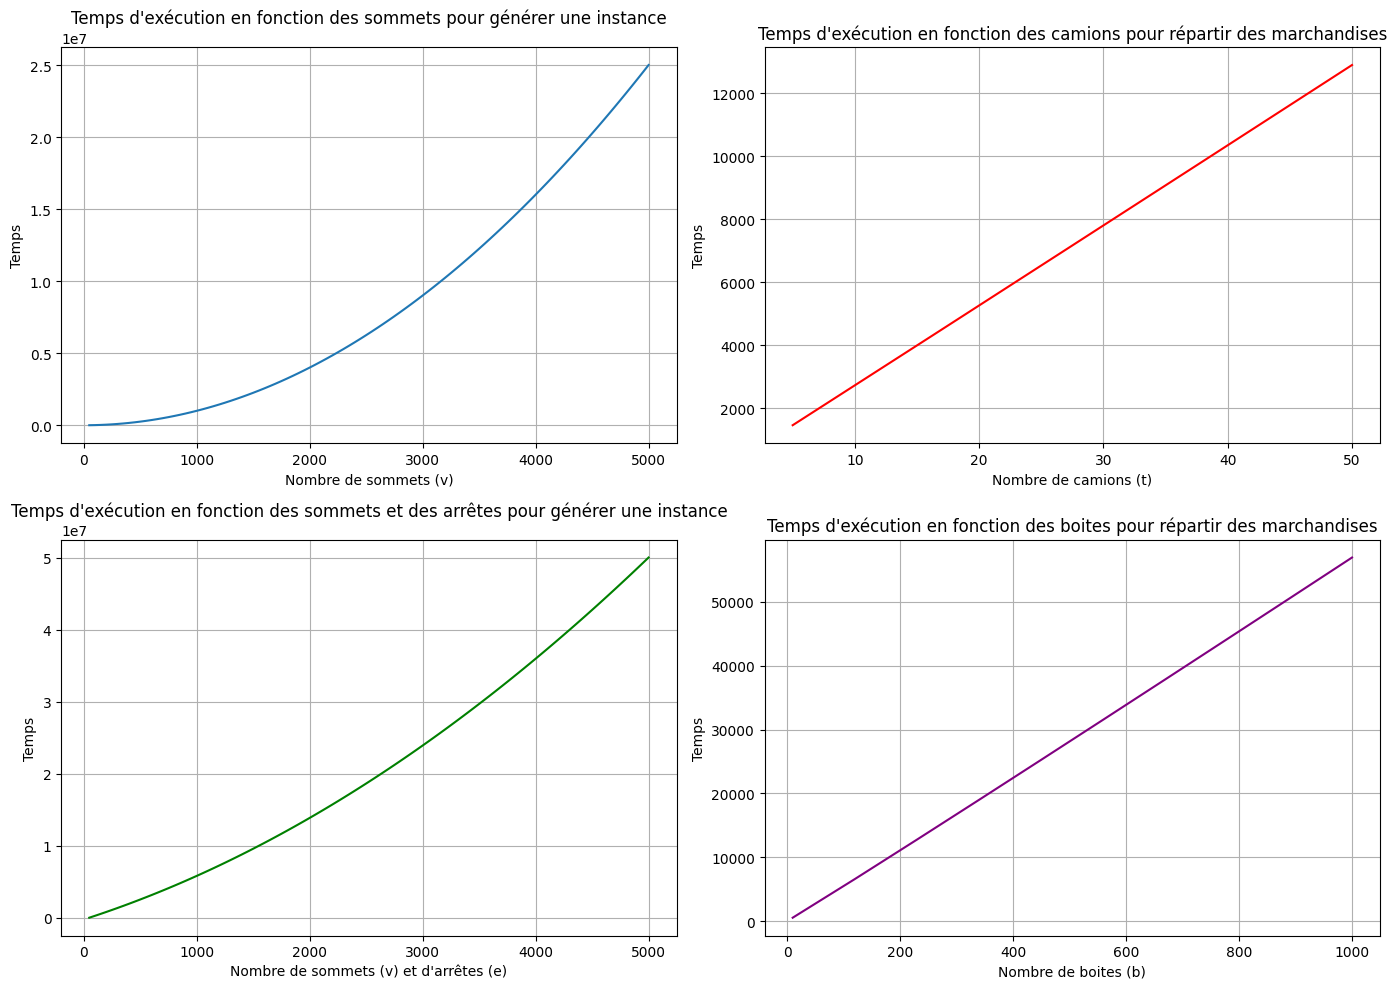

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des fonctions pour les CTT des deux algorithmes

def generation_instance_CTT(v, e, t):
    """
    Retourne la CTT pour l'algorithme de génération d'instance.
    CTT = O(v^2 + e + t)
    """
    return v**2 + e + t

def repartition_marchandises_CTT(b, t, k):
    """
    Retourne la CTT pour l'algorithme de répartition des marchandises.
    CTT = O(t*log(t) + b*log(b) + t*b*k)
    """
    return t * np.log(t) + b * np.log(b) + t * b * k

# Variables pour les simulations
v_values = np.linspace(50, 5000, 100)   # Nombre de sommets (v)
e_values = np.linspace(100, 1000, 10)  # Nombre d'arêtes (e)
t_values = np.linspace(5, 50, 5)     # Nombre de camions (t)
b_values = np.linspace(10, 1000, 10)   # Nombre de boîtes (b)
k_values = np.linspace(1, 9, 1)     # Nombre de types de boîtes (k)

# Crée un graphique pour chaque cas
plt.figure(figsize=(14, 10))

# 1. CTT en fonction du nombre de sommets (v) et d'arêtes (e)
CTT_gen_instance = np.array([generation_instance_CTT(v, 500, 10) for v in v_values])  # e=500, t=10 arbitraires
plt.subplot(2, 2, 1)
plt.plot(v_values, CTT_gen_instance, label="CTT - Generation d'instance")
plt.title('Temps d\'exécution en fonction des sommets pour générer une instance')
plt.xlabel('Nombre de sommets (v)')
plt.ylabel('Temps')
plt.grid(True)

# 2. CTT en fonction du nombre de boîtes (b) et de camions (t)
CTT_repartition = np.array([repartition_marchandises_CTT(50, t, 5) for t in t_values])  # b=50, k=5 arbitraires
plt.subplot(2, 2, 2)
plt.plot(t_values, CTT_repartition, label="CTT - Repartition des marchandises", color='red')
plt.title('Temps d\'exécution en fonction des camions pour répartir des marchandises')
plt.xlabel('Nombre de camions (t)')
plt.ylabel('Temps')
plt.grid(True)

# 3. CTT en fonction du nombre de sommets (v) et d'arêtes (e)
edge_values = np.linspace(50, 25000000, 100)
CTT_gen_instance = np.array([generation_instance_CTT(v, edge, 10) for v,edge in zip(v_values,edge_values)])  # e=500, t=10 arbitraires
plt.subplot(2, 2, 3)
plt.plot(v_values, CTT_gen_instance, label="CTT - Generation d'instance", color='green')
plt.title('Temps d\'exécution en fonction des sommets et des arrêtes pour générer une instance')
plt.xlabel('Nombre de sommets (v) et d\'arrêtes (e)')
plt.ylabel('Temps')
plt.grid(True)

# 4. CTT en fonction du nombre de boîtes (b)
CTT_repartition = np.array([repartition_marchandises_CTT(b, 10, 5) for b in b_values])
plt.subplot(2, 2, 4)
plt.plot(b_values, CTT_repartition, label="CTT - Repartition des marchandises", color='purple')
plt.title('Temps d\'exécution en fonction des boites pour répartir des marchandises')
plt.xlabel('Nombre de boites (b)')
plt.ylabel('Temps')
plt.grid(True)

# Affichage
plt.tight_layout()
plt.show()
